<a href="https://colab.research.google.com/github/Ziyeli-moc/OC-burial/blob/main/Task2_MCEP_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import gc

In [ ]:
df = pd.read_csv('raw_site_data.csv').drop(['MAR_TOC'],axis=1)

In [ ]:
df

,Core_ID,ProvinceID,Age,TOC,DBD,SR
0,U1490,WARM+SUND,0.231670,0.27,0.846860,9.736958
1,U1490,WARM+SUND,0.471090,0.17,0.891850,10.958199
2,U1490,WARM+SUND,1.221960,0.14,0.936820,14.295245
3,U1490,WARM+SUND,2.008690,0.11,0.870550,17.034747
4,U1490,WARM+SUND,2.453380,0.10,0.830480,18.263488
...,...,...,...,...,...,...
4834,62,WARM+SUND,14.001542,0.00,1.097699,10.849322
4835,62,WARM+SUND,14.254509,0.00,1.151743,9.776641
4836,62,WARM+SUND,14.507476,0.00,1.239756,8.719062
4837,62,WARM+SUND,14.760444,0.00,1.167184,7.679421


In [ ]:
#MC sampling
num_simulations = 10000

from scipy import stats

df['toc_samples'] = df.apply(lambda row: (stats.truncnorm.rvs(0, 0.5,
                             loc = row['TOC'], 
                              #scale = 0, #check
                              scale = row['TOC']*0.2,
                              #scale = 0.002,
                             size = num_simulations)), axis=1)
df['dbd_samples'] = df.apply(lambda row: (np.random.normal(row['DBD'], 
                                                           #scale=0,#check
                                                           scale = row['DBD']*0.1, 
                                                   size = num_simulations)), axis=1)

#df['dbd_samples'] = df.apply(lambda row: (stats.truncnorm.rvs(0.1, 1, #范围
#                             loc = row['dbd_samples'], #scale = 0,
#                              scale = row['dbd_samples']*0.01,
#                             size = num_simulations)), axis=1)
df['sr_samples'] = df.apply(lambda row: (np.random.normal(row['SR'] , 0, num_simulations)), axis=1)

df['mar_toc_samples'] = df['toc_samples'] * df['dbd_samples'] * df['sr_samples'] / 10

df.head(10)

,Core_ID,ProvinceID,Age,TOC,DBD,SR,toc_samples,dbd_samples,sr_samples,mar_toc_samples
0,U1490,WARM+SUND,0.23167,0.27,0.84686,9.736958,"[0.27880756455857836, 0.29615532429462627, 0.2...","[1.0210205119859284, 0.8434956244144463, 0.924...","[9.73695762096064, 9.73695762096064, 9.7369576...","[0.2771802611417017, 0.2432347710959284, 0.250..."
1,U1490,WARM+SUND,0.47109,0.17,0.89185,10.958199,"[0.17968775785605542, 0.17051809731159348, 0.1...","[0.9070196232086661, 1.017810868109537, 0.9256...","[10.9581986563668, 10.9581986563668, 10.958198...","[0.17859707502207328, 0.19018520597727026, 0.1..."
2,U1490,WARM+SUND,1.22196,0.14,0.93682,14.295245,"[0.14198498911287932, 0.1469601276816711, 0.14...","[0.9412646772808794, 0.888068181928622, 1.0077...","[14.295245403448, 14.295245403448, 14.29524540...","[0.1910494575652384, 0.18656812463970146, 0.21..."
3,U1490,WARM+SUND,2.00869,0.11,0.87055,17.034747,"[0.11635309017973688, 0.11715584343165825, 0.1...","[0.8601397891268169, 0.9840164903029269, 0.871...","[17.0347471520195, 17.0347471520195, 17.034747...","[0.1704836173954211, 0.1963821557546209, 0.172..."
4,U1490,WARM+SUND,2.45338,0.10,0.83048,18.263488,"[0.10706562260235643, 0.10631703887847604, 0.1...","[0.8320264352577146, 0.9022520703111118, 0.756...","[18.2634882368518, 18.2634882368518, 18.263488...","[0.16269376181070525, 0.1751920879980137, 0.15..."
5,U1490,WARM+SUND,3.08035,0.12,0.82524,19.630108,"[0.13049390206066838, 0.1243946594412894, 0.12...","[0.7968164008923895, 0.8215260673614636, 0.829...","[19.6301083556429, 19.6301083556429, 19.630108...","[0.20411324122429364, 0.20060686021814966, 0.2..."
6,U1490,WARM+SUND,3.44534,0.27,0.95011,20.239684,"[0.2708020434579382, 0.2928152442194263, 0.291...","[0.9972009026774447, 0.8588388692834881, 0.849...","[20.2396843001448, 20.2396843001448, 20.239684...","[0.5465606160921992, 0.5089898339717621, 0.500..."
7,U1490,WARM+SUND,3.82737,0.32,0.94920,20.739514,"[0.34637412774840887, 0.3225206534343261, 0.33...","[0.9489127797027725, 0.8785875593674659, 1.000...","[20.7395142424975, 20.7395142424975, 20.739514...","[0.6816639408286995, 0.5876803378376412, 0.692..."
8,U1490,WARM+SUND,4.32071,0.36,0.93052,21.187374,"[0.37956404656644555, 0.38944773653102754, 0.3...","[0.9662206167155923, 0.8080320056292055, 0.913...","[21.1873743044764, 21.1873743044764, 21.187374...","[0.7770312891224244, 0.6667375062906097, 0.712..."
9,U1490,WARM+SUND,4.80161,0.20,0.95518,21.423303,"[0.20747152746643135, 0.20575695413376027, 0.2...","[1.022338468774298, 1.0536988588196434, 0.8923...","[21.4233033636125, 21.4233033636125, 21.423303...","[0.4544013833397057, 0.4644697876139757, 0.414..."


In [ ]:
bins = [(c,c-1,c+1) for c in np.arange(1.5,23.5,0.5)]

def in_bins(num,bins):
  return [b[0] for b in bins if num>=b[1] and num<=b[2]]


in_bins(1.8,bins)

[1.5, 2.0, 2.5]

# New Section

In [ ]:
#explode to bins
df['Age_bins'] = df.apply(lambda row: in_bins(row['Age'],bins), axis=1)

df.head(50)


,Core_ID,ProvinceID,Age,TOC,DBD,SR,toc_samples,dbd_samples,sr_samples,mar_toc_samples,Age_bins
0,U1490,WARM+SUND,0.23167,0.27,0.84686,9.736958,"[0.27880756455857836, 0.29615532429462627, 0.2...","[1.0210205119859284, 0.8434956244144463, 0.924...","[9.73695762096064, 9.73695762096064, 9.7369576...","[0.2771802611417017, 0.2432347710959284, 0.250...",[]
1,U1490,WARM+SUND,0.47109,0.17,0.89185,10.958199,"[0.17968775785605542, 0.17051809731159348, 0.1...","[0.9070196232086661, 1.017810868109537, 0.9256...","[10.9581986563668, 10.9581986563668, 10.958198...","[0.17859707502207328, 0.19018520597727026, 0.1...",[]
2,U1490,WARM+SUND,1.22196,0.14,0.93682,14.295245,"[0.14198498911287932, 0.1469601276816711, 0.14...","[0.9412646772808794, 0.888068181928622, 1.0077...","[14.295245403448, 14.295245403448, 14.29524540...","[0.1910494575652384, 0.18656812463970146, 0.21...","[1.5, 2.0]"
3,U1490,WARM+SUND,2.00869,0.11,0.87055,17.034747,"[0.11635309017973688, 0.11715584343165825, 0.1...","[0.8601397891268169, 0.9840164903029269, 0.871...","[17.0347471520195, 17.0347471520195, 17.034747...","[0.1704836173954211, 0.1963821557546209, 0.172...","[1.5, 2.0, 2.5, 3.0]"
4,U1490,WARM+SUND,2.45338,0.10,0.83048,18.263488,"[0.10706562260235643, 0.10631703887847604, 0.1...","[0.8320264352577146, 0.9022520703111118, 0.756...","[18.2634882368518, 18.2634882368518, 18.263488...","[0.16269376181070525, 0.1751920879980137, 0.15...","[1.5, 2.0, 2.5, 3.0]"
5,U1490,WARM+SUND,3.08035,0.12,0.82524,19.630108,"[0.13049390206066838, 0.1243946594412894, 0.12...","[0.7968164008923895, 0.8215260673614636, 0.829...","[19.6301083556429, 19.6301083556429, 19.630108...","[0.20411324122429364, 0.20060686021814966, 0.2...","[2.5, 3.0, 3.5, 4.0]"
6,U1490,WARM+SUND,3.44534,0.27,0.95011,20.239684,"[0.2708020434579382, 0.2928152442194263, 0.291...","[0.9972009026774447, 0.8588388692834881, 0.849...","[20.2396843001448, 20.2396843001448, 20.239684...","[0.5465606160921992, 0.5089898339717621, 0.500...","[2.5, 3.0, 3.5, 4.0]"
7,U1490,WARM+SUND,3.82737,0.32,0.94920,20.739514,"[0.34637412774840887, 0.3225206534343261, 0.33...","[0.9489127797027725, 0.8785875593674659, 1.000...","[20.7395142424975, 20.7395142424975, 20.739514...","[0.6816639408286995, 0.5876803378376412, 0.692...","[3.0, 3.5, 4.0, 4.5]"
8,U1490,WARM+SUND,4.32071,0.36,0.93052,21.187374,"[0.37956404656644555, 0.38944773653102754, 0.3...","[0.9662206167155923, 0.8080320056292055, 0.913...","[21.1873743044764, 21.1873743044764, 21.187374...","[0.7770312891224244, 0.6667375062906097, 0.712...","[3.5, 4.0, 4.5, 5.0]"
9,U1490,WARM+SUND,4.80161,0.20,0.95518,21.423303,"[0.20747152746643135, 0.20575695413376027, 0.2...","[1.022338468774298, 1.0536988588196434, 0.8923...","[21.4233033636125, 21.4233033636125, 21.423303...","[0.4544013833397057, 0.4644697876139757, 0.414...","[4.0, 4.5, 5.0, 5.5]"


In [ ]:
#explode to bins
df_bin = df.explode('Age_bins').drop(['Age'],axis=1).dropna()

del df
gc.collect()

df_bin.head()

,Core_ID,ProvinceID,TOC,DBD,SR,toc_samples,dbd_samples,sr_samples,mar_toc_samples,Age_bins
2,U1490,WARM+SUND,0.14,0.93682,14.295245,"[0.14198498911287932, 0.1469601276816711, 0.14...","[0.9412646772808794, 0.888068181928622, 1.0077...","[14.295245403448, 14.295245403448, 14.29524540...","[0.1910494575652384, 0.18656812463970146, 0.21...",1.5
2,U1490,WARM+SUND,0.14,0.93682,14.295245,"[0.14198498911287932, 0.1469601276816711, 0.14...","[0.9412646772808794, 0.888068181928622, 1.0077...","[14.295245403448, 14.295245403448, 14.29524540...","[0.1910494575652384, 0.18656812463970146, 0.21...",2.0
3,U1490,WARM+SUND,0.11,0.87055,17.034747,"[0.11635309017973688, 0.11715584343165825, 0.1...","[0.8601397891268169, 0.9840164903029269, 0.871...","[17.0347471520195, 17.0347471520195, 17.034747...","[0.1704836173954211, 0.1963821557546209, 0.172...",1.5
3,U1490,WARM+SUND,0.11,0.87055,17.034747,"[0.11635309017973688, 0.11715584343165825, 0.1...","[0.8601397891268169, 0.9840164903029269, 0.871...","[17.0347471520195, 17.0347471520195, 17.034747...","[0.1704836173954211, 0.1963821557546209, 0.172...",2.0
3,U1490,WARM+SUND,0.11,0.87055,17.034747,"[0.11635309017973688, 0.11715584343165825, 0.1...","[0.8601397891268169, 0.9840164903029269, 0.871...","[17.0347471520195, 17.0347471520195, 17.034747...","[0.1704836173954211, 0.1963821557546209, 0.172...",2.5


In [ ]:
grouped_df = df_bin.groupby(['Age_bins','Core_ID','ProvinceID'])
df_bin_mean = grouped_df.agg(['mean']).fillna(0)


del grouped_df
del df_bin
gc.collect()

df_bin_mean.loc[1.5,'U1490',slice(None)]

,,,TOC,DBD,SR,toc_samples,dbd_samples,sr_samples,mar_toc_samples
,,,mean,mean,mean,mean,mean,mean,mean
Age_bins,Core_ID,ProvinceID,,,,,,,
1.5,U1490,WARM+SUND,0.116667,0.879283,16.53116,"[0.12180123396499087, 0.12347766999726846, 0.1...","[0.877810300555137, 0.9247789141808869, 0.8783...","[16.531160264106433, 16.531160264106433, 16.53...","[0.17474227892378824, 0.18604745613077867, 0.1..."


In [ ]:

df_bin_mean = df_bin_mean.drop(['TOC','DBD','SR'],axis=1)
df_bin_mean.columns = df_bin_mean.columns.get_level_values(0)
df_bin_mean = df_bin_mean[['mar_toc_samples']]

df_bin_mean.loc[1.5,slice(None),'ANTA+APLR']

mar_toc_samples
Age_bins Core_ID ProvinceID                                                   
1.5      1138    ANTA+APLR   [0.17733149932327633, 0.17181062672412956, 0.1...
         747     ANTA+APLR   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

In [ ]:
def get_base(row,age):
  try:
    return df_bin_mean.loc[age,row.name[1],row.name[2]]['mar_toc_samples']
  except KeyError:
    return [0]

def change_rate_c(row):
    base = 1
    age = 1.5
    #print(sum(get_base(row)))
    while True:
       #print(sum(get_base(row,age)))
       if sum(get_base(row,age)) != 0:
         base = get_base(row,age)
         return row['mar_toc_samples']/base
       else:
         if row.name[0] == 1.5:
           return np.ones(num_simulations)
         #print(age)
         age = age + 0.5

In [ ]:
df_bin_mean['change_rate'] = df_bin_mean.apply(lambda row: change_rate_c(row), axis=1)

df_bin_mean.loc[slice(None),'751','ANTA+APLR']

df_bin_mean.to_csv('site_change_rate.csv')

In [ ]:
grouped_df_provice = df_bin_mean.groupby(['Age_bins','ProvinceID'])
provice_change_rate = grouped_df_provice.agg({'change_rate':['mean']})
provice_change_rate.head(10)

provice_change_rate = provice_change_rate.reset_index()

provinces = pd.unique(provice_change_rate['ProvinceID'])

provice_change_rate = provice_change_rate.set_index(['Age_bins','ProvinceID'])

print(provice_change_rate.index)

provice_change_rate.columns = provice_change_rate.columns.get_level_values(0)

print(provice_change_rate.index)

for b in np.arange(1.5,23.5,0.5):
  for p in provinces:
    try:
      provice_change_rate.loc[b,p]
    except KeyError:
      print(b,p)
      #provice_change_rate.loc[(b,str(p)),:] = [np.nan]
      xp = np.array([x[0] for x in provice_change_rate.loc[(slice(None),str(p)),:].index.values.tolist()])
      #print(xp.size)
      #print(xp)
      x = b
      #print(xs)
      #print(provice_change_rate.loc[(slice(None),str(p)),:]['change_rate'].to_numpy())
      fp = np.vstack(provice_change_rate.loc[(slice(None),str(p)),:]['change_rate'].to_numpy()).reshape(xp.size,num_simulations)
      #print(type(provice_change_rate.loc[(1.5,str(p)),:]['change_rate']))
      #print(ys)

      y = np.array([np.interp(x, xp, fp[:,i]) for i in range(num_simulations)]).ravel()
      if p == 'ALSK+PSAE+CCAL':
        print(x)
        print(xp)
        print(xp.size)
        print(y)
        #print(fp)
      #print(y.size)
      #print(type(y))
      #print(type(y.tolist()))
      provice_change_rate.loc[(b,str(p)),'change_rate'] = [[y.tolist()]]
      provice_change_rate = provice_change_rate.sort_index()
      

      

#provice_change_rate['aa'] = provice_change_rate.groupby(['ProvinceID'])['change_rate'].apply(lambda group: group.interpolate(method='linear'))


#provice_change_rate.set_index(['Age_bins','ProvinceID'])

#provice_change_rate.loc[slice(None),'ALSK+PSAE+CCAL',slice(None)]
#provice_change_rate

MultiIndex([( 1.5,             'ALSK+PSAE+CCAL'),
            ( 1.5,                  'ANTA+APLR'),
            ( 1.5,                       'ARCT'),
            ( 1.5,       'AUSE+ARCH+ SPSG+TASM'),
            ( 1.5,                       'AUSW'),
            ( 1.5,                  'BERS+PSAW'),
            ( 1.5,                       'BPLR'),
            ( 1.5,                  'CAMR+PNEC'),
            ( 1.5,                       'CARB'),
            ( 1.5,                       'CHIL'),
            ...
            (23.0, 'MONS+INDE+ INDW+REDS+ ARAB'),
            (23.0,                  'NADR+GFST'),
            (23.0,                       'NEWZ'),
            (23.0,                  'NPSW+NPTG'),
            (23.0,                       'NWCS'),
            (23.0,                       'PEDQ'),
            (23.0,                  'SANT+FKLD'),
            (23.0,                  'SARC+NECS'),
            (23.0,                       'SSTC'),
            (23.0,                

In [ ]:
provice_change_rate['change_rate'] = provice_change_rate.apply(lambda row: np.array(row['change_rate']).ravel(), axis=1)

In [ ]:
print(provice_change_rate.loc[9,'ALSK+PSAE+CCAL'])



provice_change_rate.to_csv('provice_change_rate.csv')

change_rate    [0.14186124520165325, 0.1175176729710931, 0.11...
Name: (9.0, ALSK+PSAE+CCAL), dtype: object


In [ ]:
provice_change_rate.reset_index()

,Age_bins,ProvinceID,change_rate
0,1.5,ALSK+PSAE+CCAL,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,1.5,ANTA+APLR,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,1.5,ARCT,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,1.5,AUSE+ARCH+ SPSG+TASM,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,1.5,AUSW,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
...,...,...,...
1183,23.0,SANT+FKLD,"[1.6807935556176095, 1.8384126377585377, 1.565..."
1184,23.0,SARC+NECS,"[1.8895712029999556, 2.487855160129444, 1.8439..."
1185,23.0,SATL+BRAZ+B ENG,"[0.014167116398331263, 0.012115385577439757, 0..."
1186,23.0,SSTC,"[1.3431326393707124, 1.1459373403334958, 1.218..."


In [ ]:
df_modern = pd.read_csv('mordern_data.csv')

In [ ]:
df_final = pd.merge(provice_change_rate.reset_index(), df_modern.reset_index(),left_on='ProvinceID', right_on='ProvinceID')

provinces = pd.unique(df_final['ProvinceID'])
df_final = df_final.set_index(['Age_bins','ProvinceID'])


In [ ]:
df_final

,,change_rate,index,value
Age_bins,ProvinceID,,,
1.5,ALSK+PSAE+CCAL,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",10,0.003534
2.0,ALSK+PSAE+CCAL,"[0.8840599976420813, 0.8895843316643737, 0.901...",10,0.003534
2.5,ALSK+PSAE+CCAL,"[0.7959584795438929, 0.8010165024943241, 0.810...",10,0.003534
3.0,ALSK+PSAE+CCAL,"[0.8138151755432645, 0.8050514601939294, 0.817...",10,0.003534
3.5,ALSK+PSAE+CCAL,"[0.6981688928291148, 0.7100996872039333, 0.714...",10,0.003534
...,...,...,...,...
21.0,WARM+SUND,"[6.575730919988213, 6.537757155267774, 7.20737...",5,0.017311
21.5,WARM+SUND,"[6.7249422935575724, 6.663071600155507, 7.3397...",5,0.017311
22.0,WARM+SUND,"[6.226882032637366, 6.139161291894889, 6.72529...",5,0.017311


In [ ]:
df_final['final_value'] = df_final['change_rate'] * df_final['value']

grouped_df_final = df_final.groupby(['Age_bins'])
grouped_df_final = grouped_df_final.agg({'final_value':['sum']})

grouped_df_final.columns = grouped_df_final.columns.get_level_values(0)

grouped_df_final['final_value_mean'] = grouped_df_final.apply(lambda row:  np.mean(row['final_value']),axis=1)

grouped_df_final['final_value_std'] = grouped_df_final.apply(lambda row:  np.std(row['final_value']),axis=1)

grouped_df_final = grouped_df_final.reset_index()

grouped_df_final


df_final


,,change_rate,index,value,final_value
Age_bins,ProvinceID,,,,
1.5,ALSK+PSAE+CCAL,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",10,0.003534,"[0.003534123222, 0.003534123222, 0.00353412322..."
2.0,ALSK+PSAE+CCAL,"[0.8840599976420813, 0.8895843316643737, 0.901...",10,0.003534,"[0.003124376967308145, 0.003143900644462413, 0..."
2.5,ALSK+PSAE+CCAL,"[0.7959584795438929, 0.8010165024943241, 0.810...",10,0.003534,"[0.002813015346303884, 0.002830891022670412, 0..."
3.0,ALSK+PSAE+CCAL,"[0.8138151755432645, 0.8050514601939294, 0.817...",10,0.003534,"[0.0028761231103034577, 0.0028451510603763747,..."
3.5,ALSK+PSAE+CCAL,"[0.6981688928291148, 0.7100996872039333, 0.714...",10,0.003534,"[0.002467414897025404, 0.002509579794482357, 0..."
...,...,...,...,...,...
21.0,WARM+SUND,"[6.575730919988213, 6.537757155267774, 7.20737...",5,0.017311,"[0.11383475302729965, 0.11317737604806101, 0.1..."
21.5,WARM+SUND,"[6.7249422935575724, 6.663071600155507, 7.3397...",5,0.017311,"[0.11641780273930986, 0.11534673775980421, 0.1..."
22.0,WARM+SUND,"[6.226882032637366, 6.139161291894889, 6.72529...",5,0.017311,"[0.1077957092436311, 0.1062771451510162, 0.116..."


In [ ]:
grouped_df_final

,Age_bins,final_value,final_value_mean,final_value_std
0,1.5,"[0.16011754021746, 0.16011754021746, 0.1601175...",0.160118,0.000000
1,2.0,"[0.15145168065218148, 0.15120411124013478, 0.1...",0.149445,0.001232
2,2.5,"[0.1542509905501771, 0.1584382079698498, 0.151...",0.153865,0.002268
3,3.0,"[0.16002883251724792, 0.1654035396173931, 0.15...",0.160017,0.002890
4,3.5,"[0.19999897927313545, 0.2111368740872078, 0.19...",0.200867,0.006431
5,4.0,"[0.23424049229563232, 0.2538476871491582, 0.21...",0.236202,0.011699
6,4.5,"[0.1562308951659852, 0.15441882864051149, 0.15...",0.153455,0.003166
7,5.0,"[0.16267038527074223, 0.15833915892774203, 0.1...",0.159683,0.003949
8,5.5,"[0.16008187936866167, 0.15666405856941493, 0.1...",0.156326,0.004089
9,6.0,"[0.1680569032779129, 0.1626058012729295, 0.165...",0.167369,0.004895


No handles with labels found to put in legend.


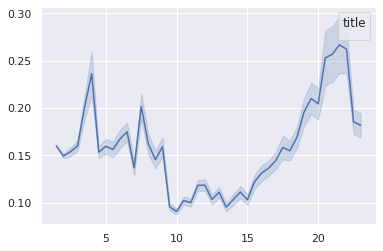

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.plot(grouped_df_final['Age_bins'],grouped_df_final['final_value_mean'], 'b-')
plt.fill_between(grouped_df_final['Age_bins'], grouped_df_final['final_value_mean'] - 2*grouped_df_final['final_value_std'], grouped_df_final['final_value_mean'] + 2*grouped_df_final['final_value_std'], color='b', alpha=0.2)

#plt.fill_between(grouped_df_final['Age_bins'], grouped_df_final['final_value_mean'] - 1*grouped_df_final['final_value_std'], grouped_df_final['final_value_mean'] + 1*grouped_df_final['final_value_std'], color='b', alpha=0.2)

plt.legend(title='title')
plt.show()